# De Community Challenge - week 49 - Anja Rentier

In deze notebook gaan we een dataset van de Bit Academy onderzoeken. De opdracht is:

### Jarvis Ratings

Bit Academy wil zijn Jarvis opdrachten gaan verbeteren om te zorgen voor een betere leeromgeving. Op basis van de feedback van studenten gaan we kijken welke opdrachten wel en niet herzien moeten worden.

Per gemaakte Jarvis opdracht kunnen studenten een rating geven. Als de gemiddelde rating van een bepaalde opdracht te laag is, dan wordt de opdracht herzien aan de hand van de feedback.

Aan jou de taak om een programma te schrijven dat kijkt welke opdrachten moeten worden herzien. Gegeven is een Jarvis Ratings bestand. Hierin staan alle ratings van de opdrachten waar we naar gaan kijken. Open het bestand even in excel of in je editor om kijken hoe de data eruit ziet.

Laat bij elke vraag zien hoe je aan je antwoord bent gekomen (zet comments bij je code).
1. Hoeveel ratings zijn er totaal gegeven?
2. Laat per opdracht zien hoeveel ratings de opdracht heeft en geef de namen van de opdrachten met een gemiddelde rating lager dan 3.
3. Op 1 mei 2021 is de opdracht Flex met boxen herzien, heeft dat geleid tot betere ratings?

Web traject: Maak een webpagina waarop je alle bovenstaande antwoorden overzichtelijk weergeeft.
Data traject: Maak een grafiek waarin je laat zien wat de invloed was van de herzage.
Upskill: Vrije keuze, kies 1 van beide trajecten, of combineer ze :)

We beginnen deze opdracht met het importeren van de modules.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from IPython.display import display, HTML, display_html

df = pd.read_csv('ratings.csv')
df.head(3)

,exercise,first_name,last_name,rating,date
0,Flex met boxen,Fergus,Crowther,5,2021-10-29
1,Commandline commands,Monica,Bartaloni,5,2021-01-05
2,Read that data,Prissie,Prangle,5,2021-10-26


Om de eerste vraag te beantwoorden maken we gebruik van de `unique` functie van pandas. We willen weten hoeveel ratings er zijn gegeven. Algemeen gezien printen we het aantal rijen nog uit en tellen de NaN waardes in de dataframe.

In [3]:
print(f'De database bevat {df.isna().sum().sum()} NaN-values.')
print(f'De database bevat {len(df.index)} rijen.')
rating = df.rating.unique()
rating = sorted(rating, reverse=False)
print(f'De volgende ratings zijn afgegeven: {str(rating)[1:-1]}')

De database bevat 0 NaN-values.
De database bevat 1000 rijen.
De volgende ratings zijn afgegeven: 1, 2, 3, 4, 5


Hoeveel ratings heeft een opdracht en welke opdrachten hebben een gemiddelde rating lager dan 3?

Om deze vraag te beantwoorden sorteren we de dataframe op opdrachten en tellen hoeveel ratings er zijn.
Daarna sorteren we de database op gemiddelde ratings en printen de opdrachten die een gemiddelde lager dan 3 hebben.

,exercise,rating
0,Commandline commands,189
1,Flex met boxen,193
2,Hover kan je gaan,216
3,Maak een kattenwebsite,198
4,Read that data,204


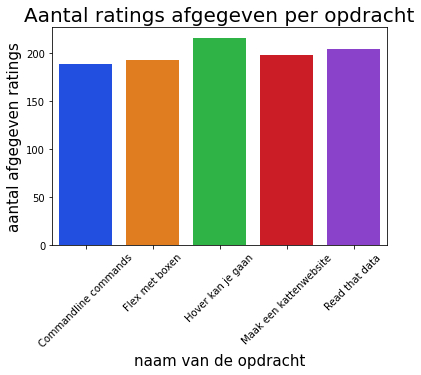

In [4]:
# groepeer op exercise en selecteer alleen kolom 'rating', tel die waardes. Daarna een index maken.
grouped_exercise = df.groupby('exercise')['rating'].count().reset_index()

# maak een barplot om de data inzichtelijk te maken
sns.barplot(x='exercise', y='rating', data=grouped_exercise, palette = 'bright')
plt.xticks(rotation=45, horizontalalignment="center")
plt.title("Aantal ratings afgegeven per opdracht", fontsize=20)
plt.xlabel("naam van de opdracht", fontsize=15)
plt.ylabel("aantal afgegeven ratings", fontsize=15)

grouped_exercise

In de grafiek hierboven is te zien hoeveel ratings de opdrachten hebben ontvangen. We gaan nu de gemiddelde rating per opdracht selecteren.

,exercise,rating_mean
4,Read that data,2.921569
3,Maak een kattenwebsite,2.989899
2,Hover kan je gaan,3.023148
0,Commandline commands,3.116402
1,Flex met boxen,3.704663


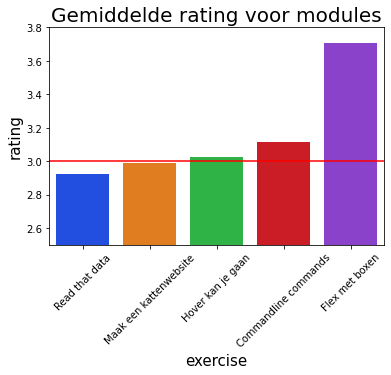

In [5]:
# groepeer op exercise en bereken de gemiddelde waarde
grouped_rating = df.groupby('exercise').agg({'rating': ['mean']})

# hernoem de kolom rating en sorteer van laag naar hoog
grouped_rating.columns = ['rating_mean']
grouped_rating = grouped_rating.reset_index().sort_values('rating_mean')

# maak een barplot om de data inzichtelijk te maken
sns.barplot(x='exercise', y='rating_mean', data=grouped_rating, palette = 'bright')
plt.xticks(rotation=45, horizontalalignment="center")
plt.title("Gemiddelde rating voor modules", fontsize=20)
plt.xlabel("exercise", fontsize=15)
plt.ylabel("rating", fontsize=15)
# een horizontale lijn ter verduidelijking van de 3 grens
plt.axhline(y=3.0, color='r', linestyle='-')
plt.ylim([2.5, 3.8])

grouped_rating

We zien in de barplot, dat de volgende modules een gemiddelde rating lager dan 3 hebben:
"Maak een kattenwebsite" en "Read the data".

Laatste vraagstuk; zijn er betere ratings, nadat de opdracht Flex met boxen is herzien? 

We gaan voor deze opdracht twee dataframes maken met data vanaf/voor 1 mei 2021 (dan is de opdracht herzien). Deze uitkomsten plotten we in 2 barplots.

In [6]:
# het datum tijd formaat in de kolom 'date' op de juiste manier formatteren
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# dataframe op 1 mei selecteren
start_date = "2021-5-1"
after_start_date = df['date'] >= start_date
before_start_date = df['date'] < start_date

# creeer 2 dataframes geselecteerd op datum voor en na 1 mei 2021
df_after = df.loc[after_start_date][['exercise', 'rating']]
df_before = df.loc[before_start_date][['exercise', 'rating']]

# groupeer dataframe op opdracht 'flex met boxen' en gemiddelde rating
df_after = df_after.groupby('exercise')['rating'].mean().reset_index()
df_before = df_before.groupby('exercise')['rating'].mean().reset_index()

# we willen de dataframes naast elkaar zien
df_before_styler = df_before.style.set_table_attributes("style='display:inline'").set_caption('Gemiddelde ratings voor 1 mei 2021')
df_after_styler = df_after.style.set_table_attributes("style='display:inline'").set_caption('Gemiddelde ratings na 1 mei 2021')

space = "\xa0" * 10
display_html(df_before_styler._repr_html_() + space + df_after_styler._repr_html_(), raw=True)


,exercise,rating
0,Commandline commands,3.214286
1,Flex met boxen,2.776471
2,Hover kan je gaan,2.978495
3,Maak een kattenwebsite,2.860465
4,Read that data,2.973684
,exercise,rating
0,Commandline commands,3.058824
1,Flex met boxen,4.435185
2,Hover kan je gaan,3.056911
3,Maak een kattenwebsite,3.089286


We maken 2 subplots van deze dataframes, om de gegevens inzichtelijk te maken en te kunnen vergelijken.

[Text(0.5, 1.0, 'Ratings na 1 mei 2021')]

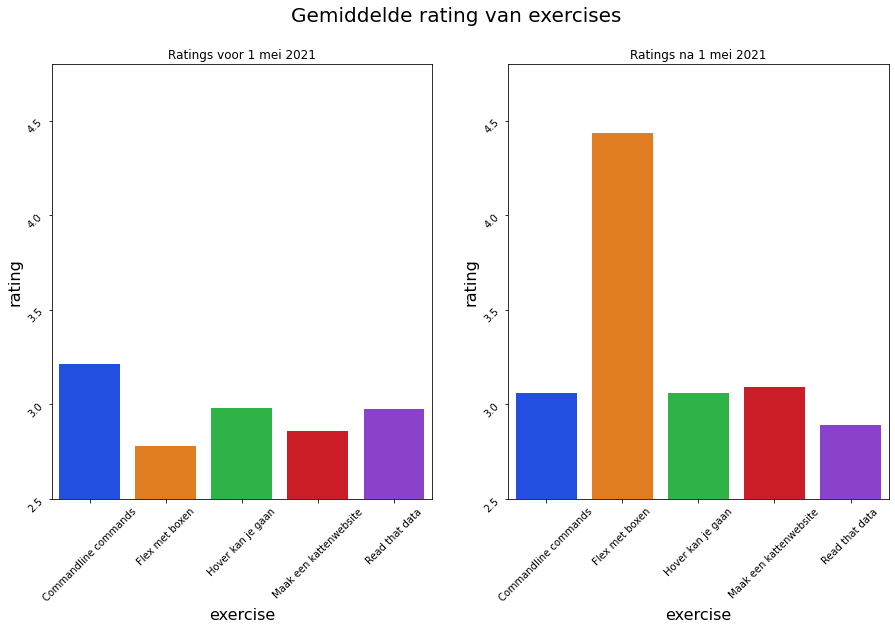

In [7]:
fig, axs = plt.subplots(1,2, figsize=(15,8), sharey=True)

# rotate ticklabels for all axes
for ax in axs:
    ax.tick_params(labelleft=True, labelrotation=45)
    ax.xaxis.label.set_size(16)
    ax.yaxis.label.set_size(16)

# titel voor de gehele plot aangeven
fig.suptitle('Gemiddelde rating van exercises', fontsize=20, color='black')
plt.ylim([2.5, 4.8])

# plot 1:
sns.barplot(ax=axs[0], data=df_before, x='exercise', y='rating', palette = 'bright').set(title='Ratings voor 1 mei 2021')

# plot2
sns.barplot(ax=axs[1], data=df_after, x='exercise', y='rating', palette = 'bright').set(title='Ratings na 1 mei 2021')

Het antwoord op het laatste vraagstuk is: de ratings voor de opdracht `Flex met boxen` zijn omhoog gegaan na de wijziging van de opdracht. Voor 1 mei is de gemiddelde rating 2,78 en na 1 mei is de gemiddelde rating 4,44.

## Conclusie

1. Er zijn 5 ratings afgegeven voor de oefeningen. Er zijn in totaal 1000 ratings afgegeven door studenten.
2. In de geprinte dataframe is te zien hoeveel ratings de opdrachten afzonderlijk hebben. De opdrachten met een rating lager dan 3 zijn de opdrachten "Maak een kattenwebsite" en "Read the data".
3. Het herzien van de opdracht Flex met boxen heeft geleid tot betere ratings.